✅ Model berhasil dilatih untuk Cabai Merah Keriting


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


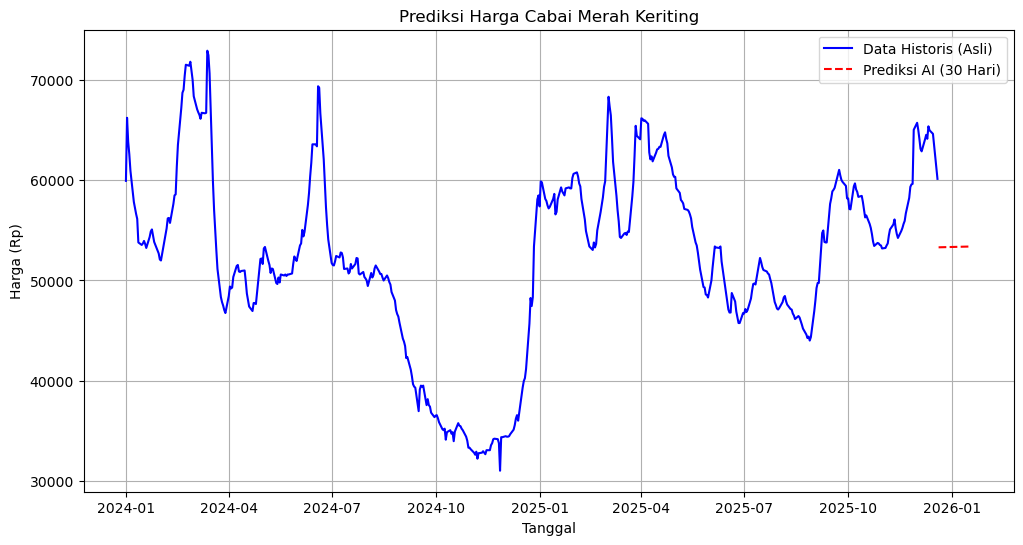

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime as dt

# 1. LOAD DATA BERSIH
df = pd.read_csv('../data/processed/data_bersih.csv')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Kita coba prediksi satu komoditas dulu: CABAI
item_target = 'Cabai Merah Keriting' # Sesuaikan nama persis dari hasil cleaning
df_cabai = df[df['Item'] == item_target].copy()

# 2. FEATURE ENGINEERING
# Mesin tidak bisa baca tanggal "2024-01-01", harus diubah jadi angka (Ordinal)
df_cabai['Date_Ordinal'] = df_cabai['Tanggal'].map(dt.datetime.toordinal)

X = df_cabai[['Date_Ordinal']] # Fitur (Input)
y = df_cabai['Harga']          # Target (Output)

# 3. LATIH MODEL (Training)
model = LinearRegression()
model.fit(X, y)
print(f"✅ Model berhasil dilatih untuk {item_target}")

# 4. PREDIKSI MASA DEPAN (Forecasting)
# Prediksi 30 hari ke depan dari tanggal terakhir data
last_date_ord = df_cabai['Date_Ordinal'].max()
future_days = 30
future_dates_ord = np.array([last_date_ord + i for i in range(1, future_days+1)]).reshape(-1, 1)

# Lakukan prediksi
prediksi_harga = model.predict(future_dates_ord)

# Kembalikan angka ordinal ke format tanggal biar bisa dibaca manusia
future_dates = [dt.date.fromordinal(int(val)) for val in future_dates_ord.flatten()]

# 5. VISUALISASI HASIL
plt.figure(figsize=(12, 6))

# Plot Data Asli
plt.plot(df_cabai['Tanggal'], df_cabai['Harga'], label='Data Historis (Asli)', color='blue')

# Plot Data Prediksi
plt.plot(future_dates, prediksi_harga, label='Prediksi AI (30 Hari)', color='red', linestyle='dashed')

plt.title(f"Prediksi Harga {item_target}")
plt.xlabel("Tanggal")
plt.ylabel("Harga (Rp)")
plt.legend()
plt.grid(True)
plt.show()